In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the dataset here
Property_details = pd.read_csv("C:\\Users\\viett\\Desktop\\Property_details.csv") # Please use your path and dataset for this parts!
# You may use Tkinter library
Order_details = pd.read_csv("C:\\Users\\viett\\Desktop\\Order_details.csv",encoding="latin-1")



**Part (a)**: How many properties are there in the region with the zip code of 84600? 

**Part (b)**: What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84600?


In [3]:
# Part (a):
Prop_zipcode_84600 = Property_details[Property_details['zipcode'] == 84600]
num_prop = Prop_zipcode_84600.shape[0]
print("Number of properties in the region with zip code of 84600:",num_prop)

Number of properties in the region with zip code of 84600: 104


In [4]:
# Part (b):
mean_rating = Prop_zipcode_84600["starrating"].mean()
std_rating = Prop_zipcode_84600["starrating"].std()
median_rating = Prop_zipcode_84600["starrating"].median()
min_rating = Prop_zipcode_84600["starrating"].min()
max_rating = Prop_zipcode_84600["starrating"].max()
print("Mean for all properties in the region with the zip code 84600 is",mean_rating)
print("Std for all properties in the region with the zip code 84600 is",std_rating)
print("Median for all properties in the region with the zip code 84600 is",median_rating)
print("Min for all properties in the region with the zip code 84600 is",min_rating)
print("Max for all properties in the region with the zip code 84600 is",max_rating)

Mean for all properties in the region with the zip code 84600 is 3.4615384615384617
Std for all properties in the region with the zip code 84600 is 0.7094791871175287
Median for all properties in the region with the zip code 84600 is 4.0
Min for all properties in the region with the zip code 84600 is 2
Max for all properties in the region with the zip code 84600 is 4




**Part (a)**: Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Fri”).

**Part (b)**: Which weekday receives an above-average number of reservations compared to all records?

In [5]:
# Part (a):
Order_details["reservation date"] = pd.to_datetime(Order_details['reservation date'])
#Creating new column and assign it with the day in the reservation date
Order_details['weekday'] = Order_details['reservation date'].dt.strftime('%a')             
Order_details.head(3)

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday
0,50677497,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Sat
1,50672149,8328096,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Sat
2,50643430,8323442,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Fri


In [6]:
# Part (b):
# Calculate the average number of reservations per weekday
avg_res_per_wd = Order_details['weekday'].value_counts().mean()

# Identify weekdays with above-average reservations
wds_abv_avg = Order_details['weekday'].value_counts()
wds_abv_avg = wds_abv_avg[wds_abv_avg > avg_res_per_wd]
print("The average number of reversations is",avg_res_per_wd)
print("Weekdays above average:",wds_abv_avg)

The average number of reversations is 23696.14285714286
Weekdays above average: weekday
Thu    26589
Mon    26539
Tue    24275
Wed    24082
Name: count, dtype: int64





**Part (a)**: In “roomamenities”, what are the top 10 common room amenities in single rooms (rooms with a maxoccupancy of 1)? A what about the 10 least common room amenities in single rooms? (For example, Air conditioning is one amenity)

**Part (b)**: What percentage does each type of room amenities occupy of the total number of reservations for single rooms?(Do not use the total number of amenities as denominator）

In [7]:
#a
Order_details = pd.read_csv('Order_details.csv', encoding='latin-1')
single_room_dt = Order_details[Order_details['maxoccupancy'] == 1]
amenities = single_room_dt['roomamenities'].str.split(': ;').explode()
amenities_cts = amenities.value_counts()
#Answer:
print("Top 10 common room amenities in single rooms:")
print(amenities_cts.head(10))
print("\n10 least common room amenities in single rooms:")
print(amenities_cts.tail(10))

Top 10 common room amenities in single rooms:
roomamenities
Air conditioning            83913
In-room safe box            83913
                            83913
Free Wi-Fi in all rooms!    82341
Hair dryer                  61079
Telephone                   57610
Toiletries                  57397
Desk                        55988
Heating                     55773
Closet                      52029
Name: count, dtype: int64

10 least common room amenities in single rooms:
roomamenities
In-room tablet              63
First aid kit               56
Air purifier                46
Scale                       35
Internet access ï¿?LAN      26
TV [in bathroom]            24
Humidifier                  21
Vending machine             16
Hot tub                     13
Open air bath privileges    12
Name: count, dtype: int64


In [8]:
#b
total_single_room_reservations = single_room_dt.shape[0]
amenities_percentage = amenities_cts / total_single_room_reservations * 100

print("\nPercentage of each type of room amenities in single rooms:")
print(amenities_percentage)


Percentage of each type of room amenities in single rooms:
roomamenities
Air conditioning            97.550570
In-room safe box            97.550570
                            97.550570
Free Wi-Fi in all rooms!    95.723088
Hair dryer                  71.005580
                              ...    
TV [in bathroom]             0.027900
Humidifier                   0.024413
Vending machine              0.018600
Hot tub                      0.015113
Open air bath privileges     0.013950
Name: count, Length: 92, dtype: float64




**Part (a)**: For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

**Part (b)**: For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Max_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [9]:
# Part (a):
Order_details = pd.read_csv('Order_details.csv', encoding='latin-1')

medians = Order_details.loc[Order_details['onsiteprice'] != 0].groupby('propertycode')['onsiteprice'].median()

Order_details['replaced_onsiteprice'] = Order_details.apply(lambda row: medians[row['propertycode']] if row['onsiteprice'] == 0 else row['onsiteprice'], axis=1)

Order_details.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,replaced_onsiteprice
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,82.36
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,636.09
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,591.74
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,881.48
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,897.53


In [10]:
# Part (b):
max_min_df = Order_details.groupby('propertycode')['replaced_onsiteprice'].agg(['max', 'min']).reset_index()

max_min_df['Normalized Maximum'] = (max_min_df['max'] - max_min_df['min']) / (max_min_df['max'].max() - max_min_df['max'].min())

max_min_df.rename(columns={'max': 'Maximum', 'min': 'Minimum'}, inplace=True)

max_min_df.to_csv('Max_Min_Price.csv', index=False)

Max_Min_Price = pd.read_csv('Max_Min_Price.csv')

Max_Min_Price.head()

,propertycode,Maximum,Minimum,Normalized Maximum
0,31,374.73,219.52,0.008589
1,56,149.51,73.46,0.004208
2,97,468.83,259.76,0.011569
3,138,321.84,169.66,0.008421
4,147,226.18,122.90,0.005715




**Part (a)**: A party of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .

**Part (b)**: If this party does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [11]:
# Part (a):
import pandasql as ps
Qa = """
    SELECT COUNT(DISTINCT p.propertyid) as num_hotels
        FROM Order_details as o
            JOIN Property_details as p
            ON o.propertycode = p.propertyid
        WHERE maxoccupancy >= 3
            AND propertytype = 'Hotels' 
            AND closed = 'N' 
            AND (hotelblock is NULL or hotelblock != 'sold out')
"""
Qa = ps.sqldf(Qa)
num_hotels = Qa['num_hotels'][0]
# Printing the result
aaa = "There are {} hotels available for a party of three.".format(num_hotels)
print(aaa)


There are 3085 hotels available for a party of three.


In [12]:
# Part (b):
Qb = """
    SELECT propertyid
    FROM (
        SELECT propertyid, MAX(replaced_onsiteprice) as max_price
        FROM (
            SELECT *
            FROM Order_details as o
            INNER JOIN Property_details as p
            ON o.propertycode = p.propertyid
        ) AS combined_data
        WHERE maxoccupancy >= 3 
          AND propertytype = 'Hotels' 
          AND closed = 'N' 
          AND (hotelblock IS NULL or hotelblock != 'sold out')
        GROUP BY propertyid
    ) AS filtered_data
    WHERE max_price <= 150
"""
Qb = ps.sqldf(Qb, globals())
avai_hotels_count = Qb.shape[0]
xxx = "There are {} hotels available for a party of three with a maximum price of 150 per night.".format(avai_hotels_count)
print(xxx)

There are 1453 hotels available for a party of three with a maximum price of 150 per night.




Merge data, filter, groupby, merge three times

**Part (a)**: For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Part (b)**: For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Hint**: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [13]:
# Part (a):
merged_data = pd.merge(Order_details, Property_details, left_on='propertycode', right_on='propertyid')
avg_price = merged_data.groupby(['country', 'propertyname'])['replaced_onsiteprice'].mean().reset_index()
most_exps = avg_price.groupby('country')['replaced_onsiteprice'].idxmax()
most_exps_hotels = avg_price.loc[most_exps]
most_exps_hotels_detailed = pd.merge(most_exps_hotels, Property_details, left_on=['propertyname', 'country'], right_on=['propertyname', 'country'], how='left')
most_exps_hotels_detailed = most_exps_hotels_detailed[['country', 'propertyname', 'replaced_onsiteprice', 'propertyid', 'city', 'zipcode', 'starrating', 'address']]
most_exps_hotels_detailed.sort_values(by='replaced_onsiteprice', ascending=False)

,country,propertyname,replaced_onsiteprice,propertyid,city,zipcode,starrating,address
11,France,Hotel Astrid,11367.060000,442720,Lourdes,65100.0,4,Place Merlasse
12,France,Hotel Astrid,11367.060000,153182,Rennes,35000.0,2,32 Avenue Louis Barthou
15,Greece,Anatolia Hotel,4795.000000,95807,Thessaloniki,54629.0,4,Lagada 13
14,Greece,Anatolia Hotel,4795.000000,239165,Mykonos,84600.0,4,Ano Mera
16,Hungary,Palma Panzio Kaposvar,3231.450000,274319,Kaposvar,7400.0,4,Szechenyi square 6
32,United Kingdom,Crackington Vean,2257.980000,8328294,Saint Gennys,NaN,4,NaN
13,Germany,Hotel Munich City,1264.736111,6582086,Munich,80339.0,4,Schwanthalerstrasse
18,Italy,Locanda Ca'Lucrezia,1123.194474,6986740,Venice,30121.0,3,"Cannaregio Calle Priuli dei Cavaletti 76,"
2,Bulgaria,Aspen Golf and Ski Resort,1072.850000,7503033,Razlog,2760.0,3,Betolovoto Aspen Golf
29,Spain,Soho Boutique Colon,1072.585000,8651540,Malaga,29001.0,4,5 Alameda Colon


In [14]:
# Part (b):
cheapest = avg_price.groupby('country')['replaced_onsiteprice'].idxmin()
cheapest_hotels = avg_price.loc[cheapest]
cheapest_hotels_detailed = pd.merge(cheapest_hotels, Property_details, left_on=['propertyname', 'country'], right_on=['propertyname', 'country'], how='left')
cheapest_hotels_detailed = cheapest_hotels_detailed[['country', 'propertyname', 'replaced_onsiteprice', 'propertyid', 'city', 'zipcode', 'starrating', 'address']]
cheapest_hotels_detailed.sort_values(by='replaced_onsiteprice', ascending=True)

,country,propertyname,replaced_onsiteprice,propertyid,city,zipcode,starrating,address
23,Romania,Hanul cu Flori,11.800000,1966150,Braila,810077.0,3,"Soseaua Focsani, Km 5"
0,Austria,Dolomitenhotel,12.060000,6537481,Lienz,9900.0,3,2 Dolomitenstrasse
22,Portugal,Hotel do Cais,13.030000,974553,Viana Do Castelo,NaN,2,"Estrada Nacional 13, Rua das flores 115, Darque"
6,Czech Republic,Hotel Praded Jesenik,14.800000,390933,Jesenik,79001.0,2,Dukelska 178
3,Bulgaria,Family Hotel Natalis,18.826667,449128,Hisarya,4180.0,2,20 Geo Milev Str.
21,Poland,Setpol 1,21.420000,8115168,Bahn,NaN,4,J3R3+WG
13,Hungary,Hotel Fama,26.268000,454523,Hodmezovasarhely,6800.0,3,Szeremlei utca 7.
15,Italy,L' Isola della Fanciulla,27.186667,7083537,Salve,73050.0,3,"Corso Colombo, 3"
29,United Kingdom,Travelodge Sunderland High Street West,27.440000,3755609,Sunderland,NaN,3,High Street West
12,Greece,Mirtia Hotel,28.477500,5302869,Pefki (Artemisio),34200.0,2,Pefki




For this part, we look at the logic and how you solve the problems. 

***Part (a):*** 

    1- You need to find "5" interesting business questions based on the datasets. Please make sure that these quastions are not similar with other groups...     
    2- Write Python code to answer the questions.    
    3- Visualize your results for each question. 
    

***Part (b):***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (5 points)
    2. You need to answer these five questions using Python and the two datasets. (5 points)
    3. You need to have at least "5" graphs to visualize your insights. (6 points)
    4. Your executive summary should be well-written. (6 points)
    5. Your results and business insights should be interesting and meaningful. (3 points)


**Note**: You may use this cell to write your 5 questions

**Question 1:** Which type of property has the most orders? List top types

**Question 2:** Which type of room has the most orders? List top types

**Question 3:** Which country has the higest price per night? List top countries

**Question 4:** What is the relationship between property star ratings and customer spending at different countries?

**Question 5:** What is the impact of seasonal trends on hotel booking prices ?




In [15]:
# Your code to answer Question 1
merged_data = pd.merge(Order_details, Property_details, left_on='propertycode', right_on='propertyid')
# Counting the number of orders for each property type
property_type_counts = merged_data['propertytype'].value_counts()
# Getting the top 5 property types with the most orders
top_property_types = property_type_counts.head(10)
top_property_types

propertytype
Hotels                163910
Resorts                 1325
Motels                   190
Holiday parks            188
Bed and breakfasts       186
Inns                      56
Campsites                 18
Name: count, dtype: int64

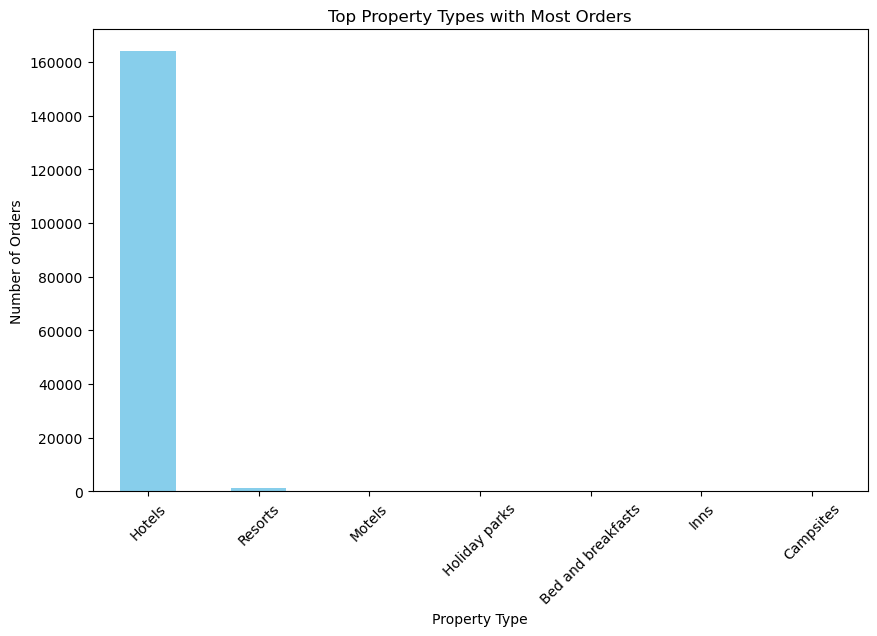

In [16]:
#Insight 1:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_property_types.plot(kind='bar', color='skyblue')
plt.title('Top Property Types with Most Orders')
plt.xlabel('Property Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Your code to answer Question 2
room_type_counts = Order_details['roomtype'].value_counts()
# Finding the most used room type
most_used_room_type = room_type_counts.idxmax()
most_used_room_count = room_type_counts.max()
most_used_room_type, most_used_room_count, room_type_counts.head(10)

('Double Room',
 8227,
 roomtype
 Double Room             8227
 Twin Room               4459
 Single Room             4260
 Standard Double Room    4151
 Triple Room             3705
 Superior Double Room    3569
 Family Room             3053
 Junior Suite            2579
 Standard Twin Room      2396
 Double or Twin Room     2207
 Name: count, dtype: int64)

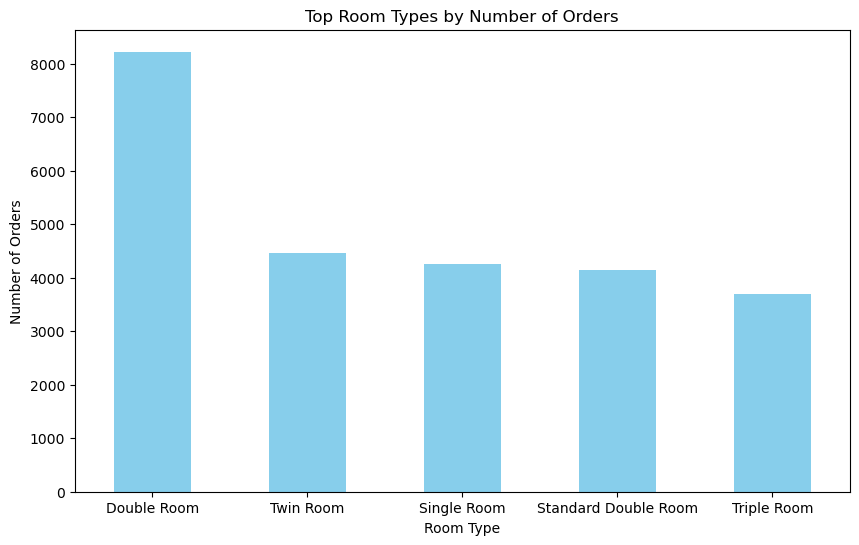

In [18]:
#Insight 2
# Plotting the top room types
plt.figure(figsize=(10, 6))
room_type_counts.head().plot(kind='bar', color='skyblue')
plt.title('Top Room Types by Number of Orders')
plt.xlabel('Room Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Your code to answer Question 3
average_price_per_country_per_night = merged_data.groupby('country')['onsiteprice'].mean()/merged_data.groupby('country')['los'].mean()
# Finding the country with the highest average onsite price
sorted_average_price_per_country_per_night = average_price_per_country_per_night.sort_values(ascending=False)
sorted_average_price_per_country_per_night

country
Croatia           211.127469
Luxembourg        189.270400
Denmark           161.853902
Cyprus            161.816976
Netherlands       156.933513
Switzerland       155.353313
Austria           152.790712
Finland           150.696205
Belgium           147.037857
United Kingdom    143.930067
Estonia           143.802325
Ireland           143.178620
France            142.488712
Slovenia          141.535903
Latvia            141.466974
Italy             138.482433
Germany           137.000600
Spain             135.819283
Malta             130.593656
Hungary           126.343626
Sweden            125.100194
Greece            119.561092
Portugal          114.369509
Czech Republic     95.974508
Poland             94.885087
Lithuania          89.582534
Romania            79.120466
Bulgaria           76.820540
Slovakia           74.038975
dtype: float64

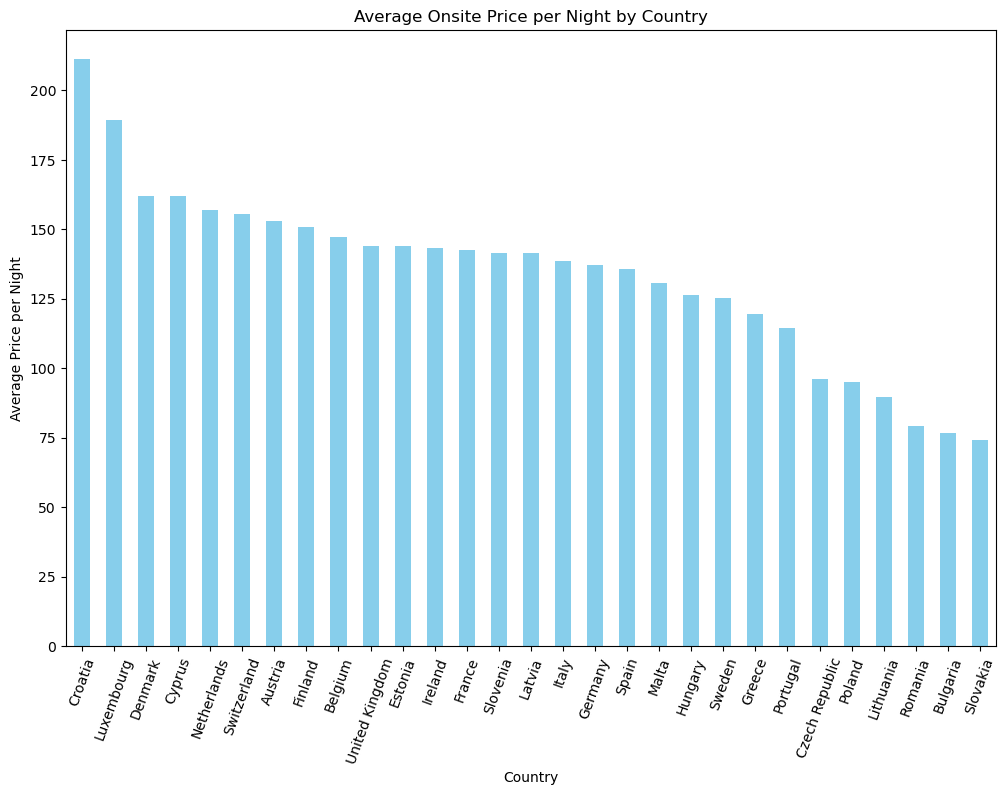

In [20]:
#Insight 3:
plt.figure(figsize=(12, 8))
sorted_average_price_per_country_per_night.plot(kind='bar', color='skyblue')
plt.title('Average Onsite Price per Night by Country')
plt.xlabel('Country')
plt.ylabel('Average Price per Night')
plt.xticks(rotation=70)
plt.show()

In [21]:
# Your code to answer Question 4
average_spending_per_rating_location = merged_data.groupby(['starrating', 'country'])['onsiteprice'].mean().reset_index()
sorted_data2 = average_spending_per_rating_location.sort_values(by=['starrating', 'onsiteprice'], ascending=[False, False])
sorted_data2

,starrating,country,onsiteprice
57,4,Croatia,295.322255
63,4,France,203.253383
71,4,Luxembourg,197.551953
58,4,Cyprus,193.957326
81,4,Switzerland,190.857348
...,...,...,...
14,2,Lithuania,51.110000
11,2,Hungary,47.762727
19,2,Romania,37.945000
5,2,Czech Republic,37.248000


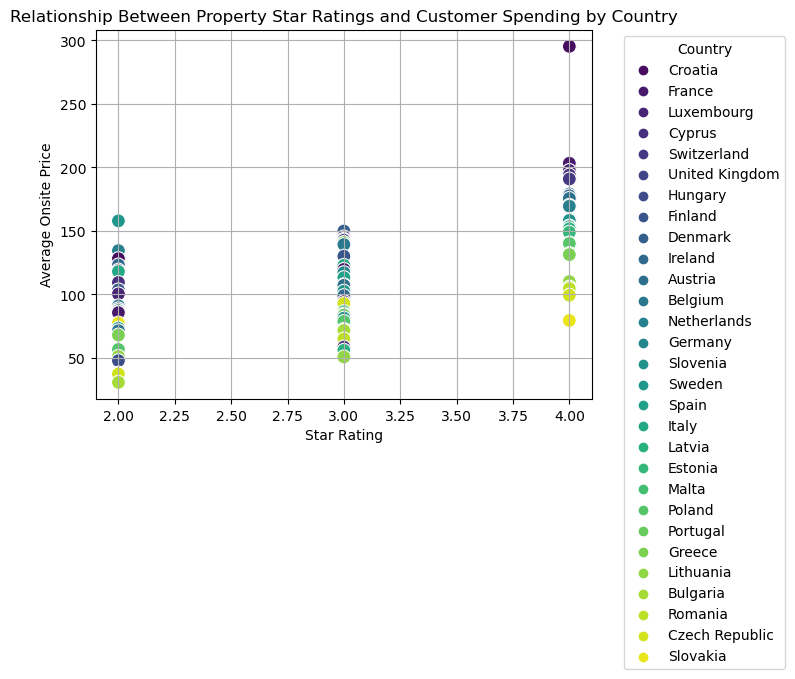

In [22]:
import seaborn as sns
sns.scatterplot(x='starrating', y='onsiteprice', hue='country', data=sorted_data2, palette='viridis', s=100)
plt.title('Relationship Between Property Star Ratings and Customer Spending by Country')
plt.xlabel('Star Rating')
plt.ylabel('Average Onsite Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [23]:
# Your code to answer Question 5
merged_data['reservation date'] = pd.to_datetime(merged_data['reservation date'], errors='coerce')
merged_data['month'] = merged_data['reservation date'].dt.month

# Group by month,calculate the average price
monthly_price_trends = merged_data.groupby('month')['onsiteprice'].mean()
# Sort by month
monthly_price_trends = monthly_price_trends.sort_index()
monthly_price_trends

month
1     137.619641
10    134.368651
11    136.620532
12    143.327347
Name: onsiteprice, dtype: float64

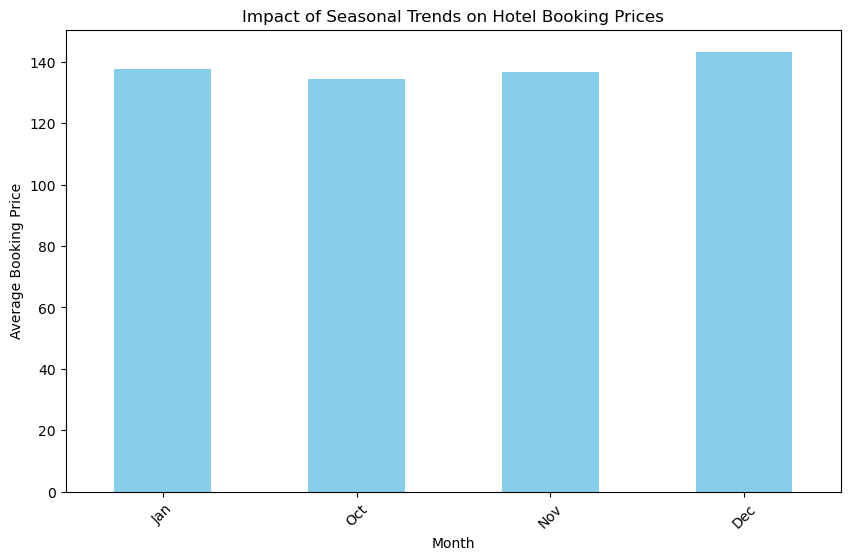

In [24]:
#Insight
plt.figure(figsize=(10, 6))
monthly_price_trends.plot(kind='bar', color='skyblue')
plt.title('Impact of Seasonal Trends on Hotel Booking Prices')
plt.xlabel('Month')
plt.ylabel('Average Booking Price')
plt.xticks(ticks=range(4), labels=['Jan', 'Oct', 'Nov','Dec'], rotation=45)
plt.show()

### Executive Summary & Business insights:



With the five questions, I have given relevant information to evaluate the dataset and pulled out important patterns which can support in making business decisions.

With the first question, I found out that "Hotel" outnumbered every other type of property. This finding highlights that hotels are the most stable which is a crucial insight for anyone looking to start a business in this sector. However, this can also be viewed from the perspective that markets for motels, campsites, and other property types hold great growth potential due to fewer competitors.

For the second question, I discovered that the type of room receiving the most orders was the "Double Room". This list, which ranks room types by orders count, can help property owners understand the proportion of room types they should offer in their rental properties. This insight is particularly valuable for those planning the room distribution in new hotels or considering renovations in existing properties.

In the third question, I analyzed and printed out the average price per night for different countries. This data can be crucial for me or any businessman looking to enter these markets, as it guides us in setting competitive pricing that aligns with market rates, avoiding the chances of overpricing or underpricing.

In the fourth question, I evaluated the correlation between price and customer ratings. From the plot, businesses can strategically price their properties to align with market expectations.

By answering the final question, from the table, business man can price their properties base on the month of the year. To be particular, January, October and November prices are almost the same, however, December seems to be 10% more expensive. 

In conclusion, my analysis provides valuable insights for newcomers to understand the industry's averages for strategic decision-making and for established businesses to enhance performance based on my researched findings.